<a href="https://colab.research.google.com/github/R195054T/dockerfiles/blob/master/Python_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import yfinance as yf

In [61]:
apple = yf.Ticker("AAPL")

In [62]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-01-05 12:51:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.2’

apple.json.2        100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-01-05 12:51:33 (1.74 GB/s) - ‘apple.json.2’ saved [5699/5699]



In [63]:
import json

with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of the apple_info variable
    print("Type:", type(apple_info))

# Optionally, print the contents of apple_info
print(apple_info)

TypeError: 'DataFrame' object is not callable

In [ ]:
apple_info['country']

In [ ]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data.head()

In [ ]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.plot(x="Date", y="Open")

In [ ]:
apple.dividends

In [ ]:
apple.dividends.plot()

In [ ]:
amd = yf.Ticker("AMD")
amd.info

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

In [64]:
import json

with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of the amd_info variable
    print("Type:", type(amd_info))

# Optionally, print the contents of amd_info
print(amd_info)

TypeError: 'DataFrame' object is not callable

In [ ]:
amd_info['country']

In [ ]:
sector = amd_info.get('sector', 'Sector not found')
print("Sector:", sector)

In [ ]:
amd_history = amd.history(period="max")
amd_history.head()

In [ ]:
first_day_volume = amd_history['Volume'].iloc[0]

In [ ]:
first_day_volume

In [65]:
from bs4 import BeautifulSoup
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [66]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [67]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [68]:
tesla = yf.Ticker("TSLA")
tesla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [69]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,449.519989,450.000000,426.500000,431.660004,82666800,0.0,0.0
2024-12-30 00:00:00-05:00,419.399994,427.000000,415.750000,417.410004,64941000,0.0,0.0
2024-12-31 00:00:00-05:00,423.790009,427.929993,402.540009,403.839996,76825100,0.0,0.0


In [70]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [71]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text

html_data

'\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\n\t\t<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    \n\t\t\t\t\n\t\t\t\t&lt;ul style=\'margin-top:10p

In [72]:
soup = BeautifulSoup(html_data, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>\n  <title>\n   Tesla Revenue 2010-2022 | TSLA | MacroTrends\n  </title>\n  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    \n\t\t\t\t\n\t\t\t\t&lt;ul style=\'margin-top:10px;\'&gt;\n\t\t\t\t&lt;li&gt;T

In [76]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 2: Find the Relevant Table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')


In [83]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 2: Find the Relevant Table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Check for the Tesla Quarterly Revenue Table
# Find all tables and inspect to find the correct one
tables = soup.find_all('table')
quarterly_revenue_table = tables[1]  # Assuming the second table is the quarterly revenue

# Step 4: Iterate Through Rows in the Table Body
for row in quarterly_revenue_table.find_all('tr')[1:]:  # Skip the header row
    # Step 5: Extract Data from Columns
    cols = row.find_all('td')
    date = cols[0].get_text(strip=True)  # Get the date
    revenue = cols[1].get_text(strip=True)  # Get the revenue

    # Step 6: Append Data to the DataFrame
    # Create a temporary DataFrame for the new row
    new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [89]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-89-2aef5327de36>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

<ipython-input-90-95b130e30048>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


In [96]:
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="5d")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-27 00:00:00-05:00,32.389999,33.049999,30.730000,32.200001,10141700,0.0,0.0
2024-12-30 00:00:00-05:00,31.799999,32.880001,31.610001,32.009998,9593100,0.0,0.0
2024-12-31 00:00:00-05:00,32.060001,32.439999,31.100000,31.340000,7395300,0.0,0.0
2025-01-02 00:00:00-05:00,31.840000,32.049999,30.370001,30.660000,7979700,0.0,0.0
2025-01-03 00:00:00-05:00,30.799999,32.139999,30.570000,31.650000,7425800,0.0,0.0


In [97]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

html_data_2

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src=

In [98]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using Beautiful Soup with the 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')

soup.title.string

'GameStop Revenue 2006-2020 | GME | MacroTrends'

In [100]:
tables = soup.find_all('table')
gme_revenue_table = tables[0]  # Assuming the first table is the one we want

# Extract data from the table
data = []
for row in gme_revenue_table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    date = cols[0].get_text(strip=True)
    revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')  # Clean revenue
    data.append({'Date': date, 'Revenue': float(revenue)})

# Create a DataFrame
gme_revenue = pd.DataFrame(data)

gme_revenue.tail()

,Date,Revenue
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


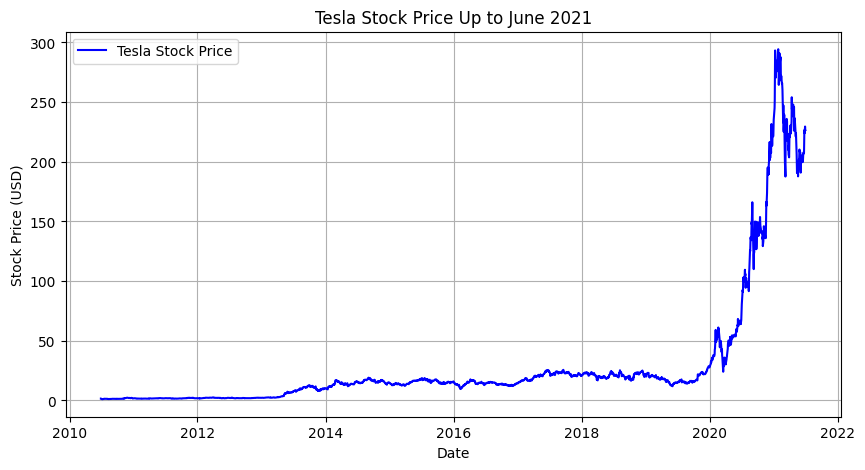

In [103]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla_ticker = yf.Ticker("TSLA")

# Get historical market data up to the current date
tesla_data = tesla_ticker.history(period="max")

# Filter the data to include only up to June 2021
tesla_data_filtered = tesla_data[tesla_data.index <= '2021-06-30']

# Define the make_graph function (assuming this is defined elsewhere in your code)
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Call the make_graph function with the filtered data
make_graph(tesla_data_filtered, title="Tesla Stock Price Up to June 2021")